In [1]:
# pip install alpha_vantage

In [19]:
from alpha_vantage.timeseries import TimeSeries

api_key = 'KVCLGB5TTYV9J8J0'

ts = TimeSeries(key=api_key, output_format='pandas')
data, meta_data = ts.get_daily(symbol='YHOO', outputsize='full')
print(data)

            1. open  2. high  3. low  4. close  5. volume
date                                                     
2017-06-26    52.58    52.58   52.58     52.58        0.0
2017-06-23    52.58    52.58   52.58     52.58        0.0
2017-06-22    52.58    52.58   52.58     52.58        0.0
2017-06-21    52.58    52.58   52.58     52.58        0.0
2017-06-20    52.58    52.58   52.58     52.58        0.0
...             ...      ...     ...       ...        ...
1999-11-05   186.10   186.50  183.00    183.40  4875800.0
1999-11-04   183.10   185.50  181.30    182.10  5710100.0
1999-11-03   179.40   182.40  178.60    180.60  4550600.0
1999-11-02   181.00   181.50  176.90    178.00  4053000.0
1999-11-01   179.50   183.00  178.00    180.70  5534000.0

[4441 rows x 5 columns]


In [20]:
data.tail()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
1999-11-05,186.1,186.5,183.0,183.4,4875800.0
1999-11-04,183.1,185.5,181.3,182.1,5710100.0
1999-11-03,179.4,182.4,178.6,180.6,4550600.0
1999-11-02,181.0,181.5,176.9,178.0,4053000.0
1999-11-01,179.5,183.0,178.0,180.7,5534000.0


In [21]:
# data.to_csv('Yahoo_historical_data_.csv')

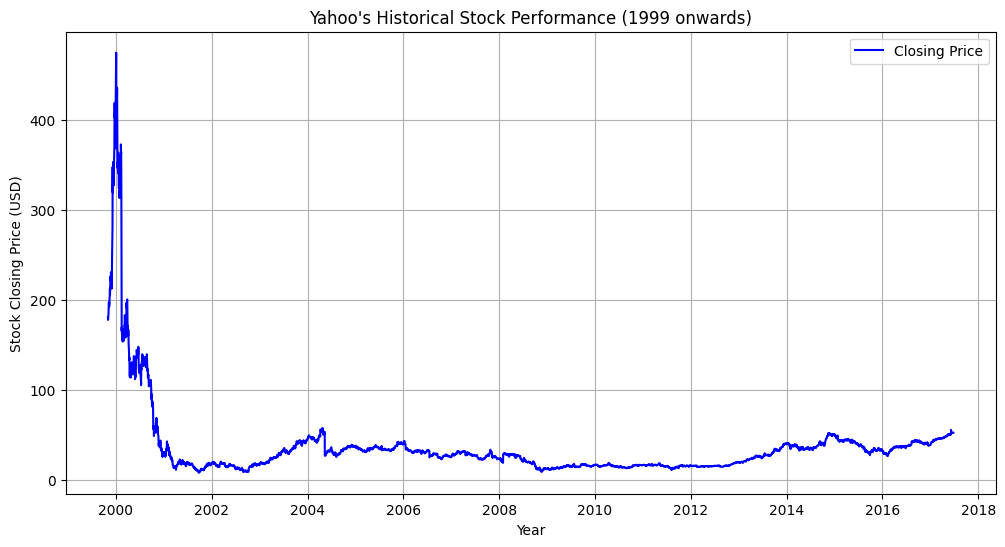

In [22]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert the date column to datetime and sort by date
data.index = pd.to_datetime(data.index)
data = data.sort_index() 

# Rename columns
data.rename(columns={'1. open': 'open', '2. high': 'high', '3. low': 'low', 
                     '4. close': 'close', '5. volume': 'volume'}, inplace=True)

# Plot the closing price over time
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['close'], color='blue', label='Closing Price')
plt.title("Yahoo's Historical Stock Performance (1999 onwards)")
plt.xlabel('Year')
plt.ylabel('Stock Closing Price (USD)')
plt.grid(True)
plt.legend()
plt.show()

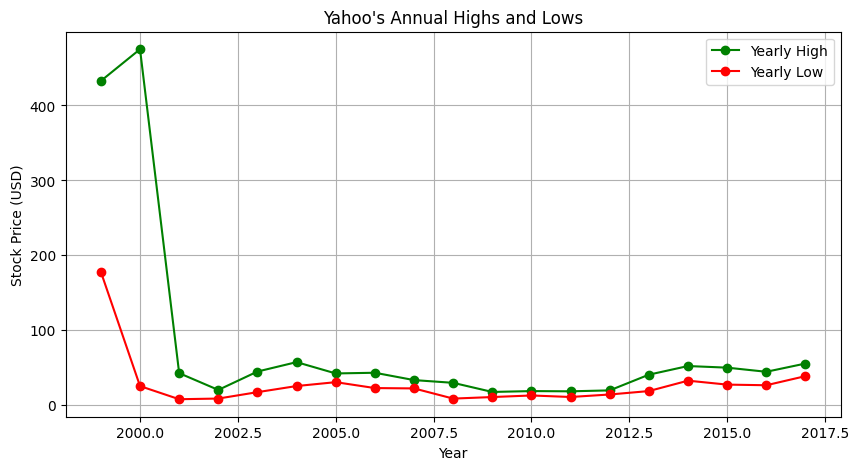

In [23]:
# Identify key peaks and troughs in the stock price
data['year'] = data.index.year

# Calculate yearly high and low to identify major trends
yearly_summary = data.groupby('year').agg({'close': ['max', 'min'], 'volume': 'mean'}).reset_index()
yearly_summary.columns = ['year', 'max_close', 'min_close', 'avg_volume']

# Plot yearly high and low
plt.figure(figsize=(10, 5))
plt.plot(yearly_summary['year'], yearly_summary['max_close'], color='green', marker='o', label='Yearly High')
plt.plot(yearly_summary['year'], yearly_summary['min_close'], color='red', marker='o', label='Yearly Low')
plt.title("Yahoo's Annual Highs and Lows")
plt.xlabel('Year')
plt.ylabel('Stock Price (USD)')
plt.grid(True)
plt.legend()
plt.show()

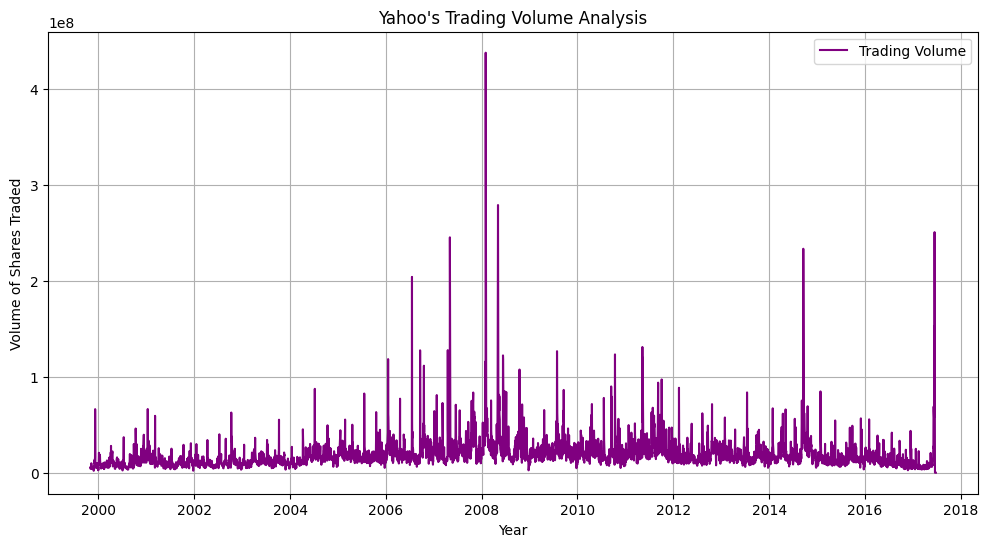

In [24]:
# Plot the trading volume over time
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['volume'], color='purple', label='Trading Volume')
plt.title("Yahoo's Trading Volume Analysis")
plt.xlabel('Year')
plt.ylabel('Volume of Shares Traded')
plt.grid(True)
plt.legend()
plt.show()

In [25]:
yearly_summary = data.groupby('year').agg({'close': ['max', 'min'], 'volume': 'mean'}).reset_index()
yearly_summary.columns = ['year', 'max_close', 'min_close', 'avg_volume']
key_years = [2000, 2002, 2008, 2014, 2017]
summary_df = yearly_summary[yearly_summary['year'].isin(key_years)]

In [26]:
summary_df

,year,max_close,min_close,avg_volume
1,2000,475.00,25.6300,1.093453e+07
3,2002,20.50,9.0000,1.092274e+07
9,2008,29.98,8.9500,3.377363e+07
15,2014,52.37,32.8684,2.414724e+07
18,2017,55.71,38.9000,1.306825e+07
